<a href="https://colab.research.google.com/github/ammu1maru2/WEBSITE-PERFORMANCE-ANALYSIS-PROJECT/blob/main/website_performance_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df = pd.read_csv("data-export (1).csv", encoding = 'latin-1')

In [16]:
df.head()

,# ----------------------------------------,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Session primary channel group (Default channel...,Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
1,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
2,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
3,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
4,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044


In [17]:
df.columns = df.iloc[0]
df = df.drop(index=0).reset_index(drop=True)
df.columns = ["Channel group","Date Hour","Users","Sessions", "Engaged sessions","Average time per session","Engaged sessions per user"," Event per session","Engagement rate","Event count"]

In [18]:
df.head()

,Channel group,Date Hour,Users,Sessions,Engaged sessions,Average time per session,Engaged sessions per user,Event per session,Engagement rate,Event count
0,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
1,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
2,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
3,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044
4,Organic Social,2024041720,175,221,112,46.918552036199100,0.64,4.529411764705880,0.5067873303167420,1001


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Channel group              3182 non-null   object
 1   Date Hour                  3182 non-null   object
 2   Users                      3182 non-null   object
 3   Sessions                   3182 non-null   object
 4   Engaged sessions           3182 non-null   object
 5   Average time per session   3182 non-null   object
 6   Engaged sessions per user  3182 non-null   object
 7    Event per session         3182 non-null   object
 8   Engagement rate            3182 non-null   object
 9   Event count                3182 non-null   object
dtypes: object(10)
memory usage: 248.7+ KB


CLEANING DATA AND DATA VALIDATION FOR THE ABOVE DATA SET

In [20]:
df["Date Hour"] = pd.to_datetime(df["Date Hour"], format = "%Y%m%d%H", errors='coerce')
df.head()

,Channel group,Date Hour,Users,Sessions,Engaged sessions,Average time per session,Engaged sessions per user,Event per session,Engagement rate,Event count
0,Direct,2024-04-16 23:00:00,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
2,Direct,2024-04-17 23:00:00,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044
4,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552036199100,0.64,4.529411764705880,0.5067873303167420,1001


In [21]:
numeric_cols = df.columns.drop(["Channel group","Date Hour"])
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')
df["Hour"] = df["Date Hour"].dt.hour
df.head()

,Channel group,Date Hour,Users,Sessions,Engaged sessions,Average time per session,Engaged sessions per user,Event per session,Engagement rate,Event count,Hour
0,Direct,2024-04-16 23:00:00,237,300,144,47.526667,0.607595,4.673333,0.480000,1402,23
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19
2,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
4,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Channel group              3182 non-null   object        
 1   Date Hour                  3182 non-null   datetime64[ns]
 2   Users                      3182 non-null   int64         
 3   Sessions                   3182 non-null   int64         
 4   Engaged sessions           3182 non-null   int64         
 5   Average time per session   3182 non-null   float64       
 6   Engaged sessions per user  3182 non-null   float64       
 7    Event per session         3182 non-null   float64       
 8   Engagement rate            3182 non-null   float64       
 9   Event count                3182 non-null   int64         
 10  Hour                       3182 non-null   int32         
dtypes: datetime64[ns](1), float64(4), int32(1), int64(4), object(1)
memor

In [23]:
df.describe()

,Date Hour,Users,Sessions,Engaged sessions,Average time per session,Engaged sessions per user,Event per session,Engagement rate,Event count,Hour
count,3182,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000
mean,2024-04-20 01:17:07.278441216,41.935889,51.192646,28.325581,66.644581,0.606450,4.675969,0.503396,242.272470,11.807040
min,2024-04-06 00:00:00,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,2024-04-13 02:15:00,20.000000,24.000000,13.000000,32.103034,0.561404,3.750000,0.442902,103.000000,6.000000
50%,2024-04-20 02:00:00,42.000000,51.000000,27.000000,49.020202,0.666667,4.410256,0.545455,226.000000,12.000000
75%,2024-04-26 22:00:00,60.000000,71.000000,41.000000,71.487069,0.750000,5.217690,0.633333,339.000000,18.000000
max,2024-05-03 23:00:00,237.000000,300.000000,144.000000,4525.000000,2.000000,56.000000,1.000000,1402.000000,23.000000
std,NaN,29.582258,36.919962,20.650569,127.200659,0.264023,2.795228,0.228206,184.440313,6.886686


SESSIONS AND USER OVER TIME

In [24]:
sns.set(style="whitegrid")

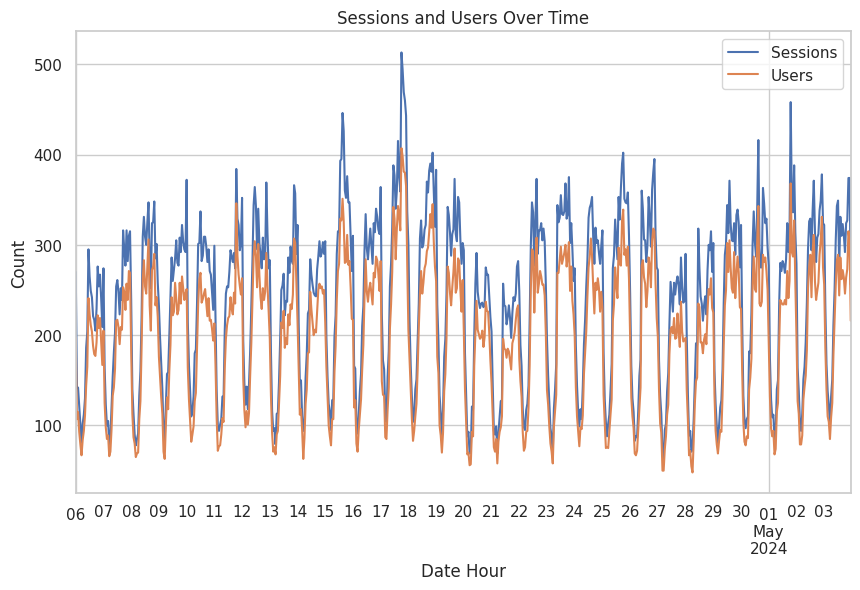

In [25]:

plt.figure(figsize=(10,6))
df.groupby("Date Hour")[["Sessions","Users"]].sum().plot(ax=plt.gca())
plt.title("Sessions and Users Over Time")
plt.xlabel("Date Hour")
plt.ylabel("Count")
plt.show()

TOTAL USER BY CHANNEL

/tmp/ipython-input-181723412.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Channel group", y="Users", estimator=np.sum, palette="viridis")


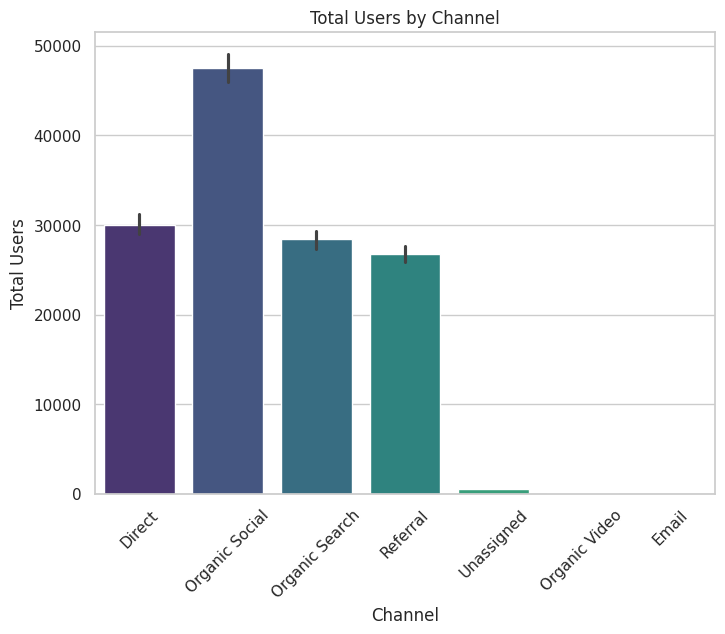

In [26]:
plt.figure(figsize=(8,6))
sns.barplot(data=df, x="Channel group", y="Users", estimator=np.sum, palette="viridis")
plt.title("Total Users by Channel")
plt.xlabel("Channel")
plt.ylabel("Total Users")
plt.xticks(rotation=45)
plt.show()

AVERAGE ENGAGEMENT BY TIME NY CHANNEL

In [27]:
df.head()

,Channel group,Date Hour,Users,Sessions,Engaged sessions,Average time per session,Engaged sessions per user,Event per session,Engagement rate,Event count,Hour
0,Direct,2024-04-16 23:00:00,237,300,144,47.526667,0.607595,4.673333,0.480000,1402,23
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19
2,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
4,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20


/tmp/ipython-input-1922493445.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df,x="Channel group", y="Average time per session", estimator=np.mean, palette="magma")


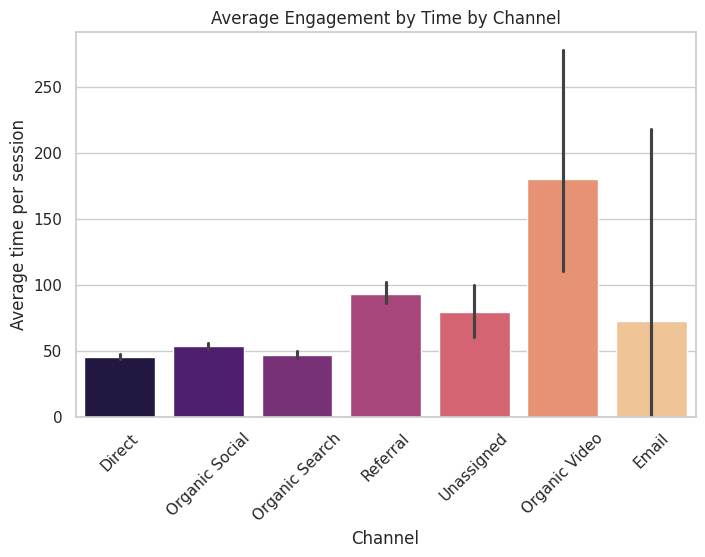

In [28]:
plt.figure(figsize=(8,5))
sns.barplot(data=df,x="Channel group", y="Average time per session", estimator=np.mean, palette="magma")
plt.title("Average Engagement by Time by Channel")
plt.xticks(rotation=45)
plt.xlabel("Channel")
plt.ylabel("Average time per session")
plt.show()

ENGAGMENT RATE BY DISTRIBUTION BY CHANNEL

/tmp/ipython-input-2228985305.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Channel group", y="Engagement rate", palette="coolwarm")


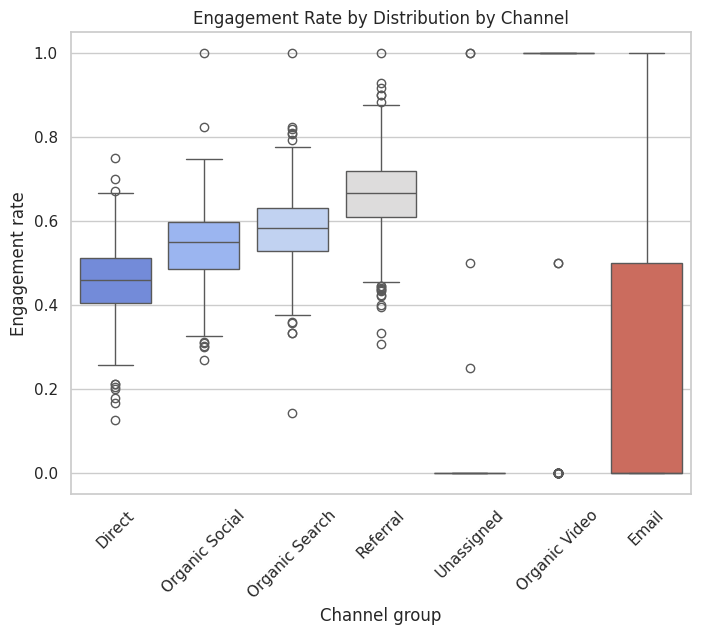

In [29]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x="Channel group", y="Engagement rate", palette="coolwarm")
plt.title("Engagement Rate by Distribution by Channel")
plt.xticks(rotation=45)
plt.xlabel("Channel group")
plt.ylabel("Engagement rate")
plt.show()

ENGAGED Vs NON ENGAGED SESSIONS

In [30]:
df.head()

,Channel group,Date Hour,Users,Sessions,Engaged sessions,Average time per session,Engaged sessions per user,Event per session,Engagement rate,Event count,Hour
0,Direct,2024-04-16 23:00:00,237,300,144,47.526667,0.607595,4.673333,0.480000,1402,23
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19
2,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
4,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20


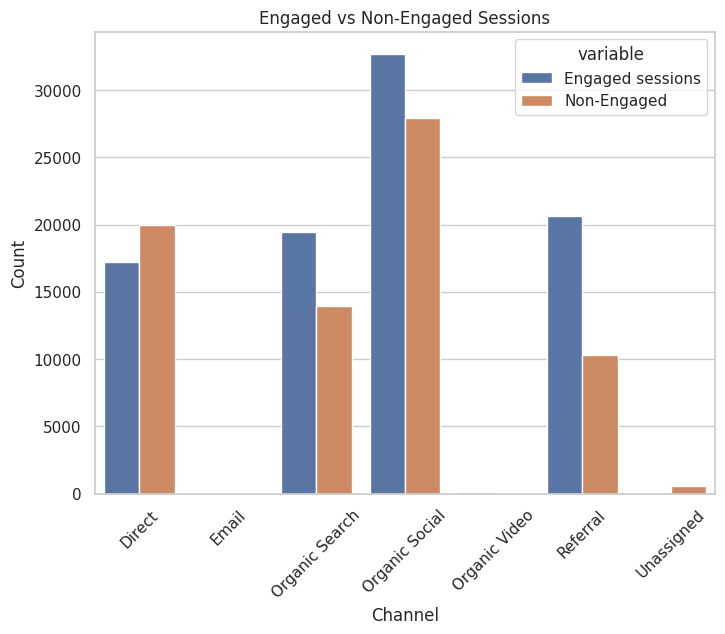

In [31]:
session_df = df.groupby("Channel group")[["Sessions", "Engaged sessions"]].sum().reset_index()
session_df["Non-Engaged"] = session_df["Sessions"] - session_df["Engaged sessions"]
session_df_melted = session_df.melt(id_vars="Channel group", value_vars=["Engaged sessions", "Non-Engaged"])

plt.figure(figsize=(8,6))
sns.barplot(data=session_df_melted, x="Channel group", y="value", hue="variable")
plt.title("Engaged vs Non-Engaged Sessions")
plt.xlabel("Channel")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

TRAFFIC BY HOUR AND CHANNEL

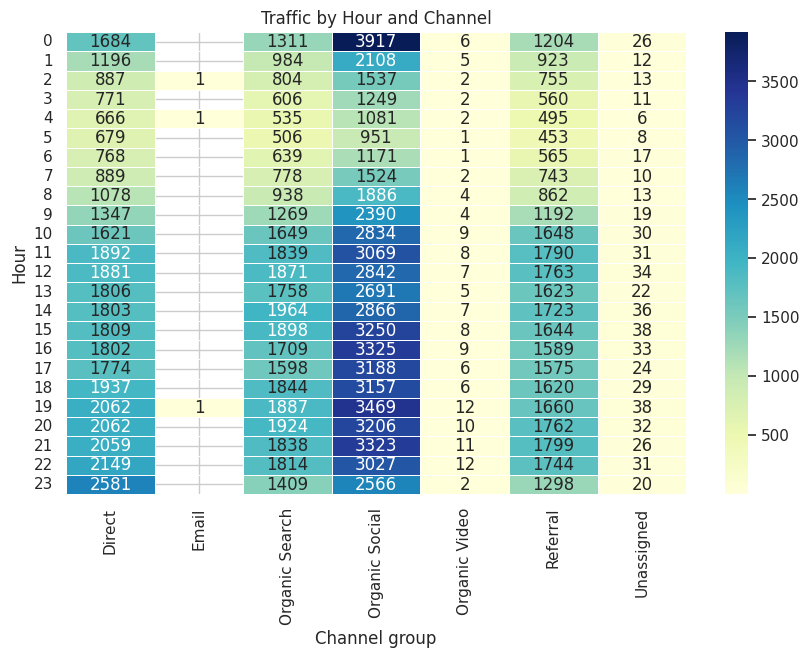

In [32]:
heatmap_data = df.groupby(["Hour", "Channel group"])["Sessions"].sum().unstack()

plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu",linewidths=.5, fmt='.0f')
plt.title("Traffic by Hour and Channel")
plt.xlabel("Channel group")
plt.ylabel("Hour")
plt.show()

ENGAGEMENT RATE VS SESSIONS OVER TIME

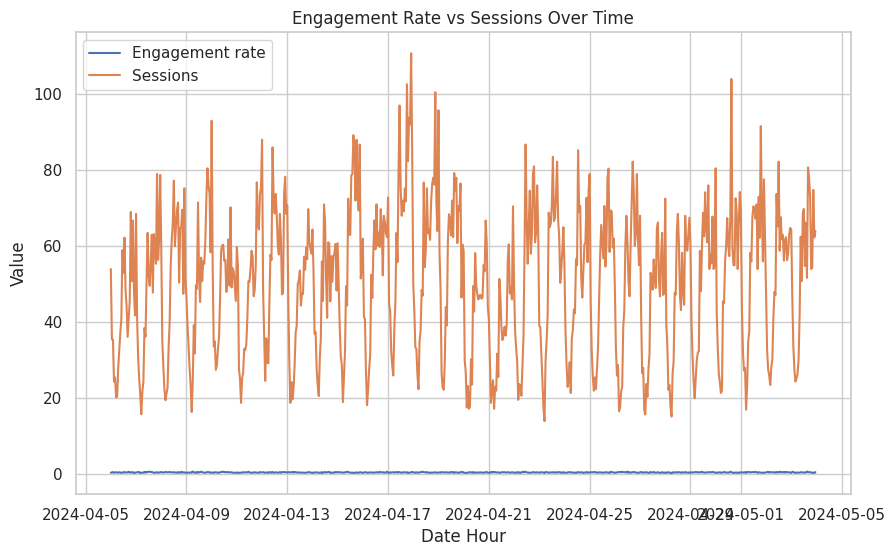

In [36]:
df_plot = df.groupby("Date Hour")[["Engagement rate","Sessions"]].mean().reset_index()

plt.figure(figsize=(10,6))
plt.plot(df_plot["Date Hour"], df_plot["Engagement rate"], label="Engagement rate")
plt.plot(df_plot["Date Hour"], df_plot["Sessions"], label="Sessions")
plt.title("Engagement Rate vs Sessions Over Time")
plt.xlabel("Date Hour")
plt.ylabel("Value")
plt.legend()
plt.show()